In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dm1Progetto/dataset/datasetCopiaSUPEROK.csv')

# esp1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_km = pd.read_csv('/content/drive/MyDrive/dm1Progetto/dataset/datasetCopiaSUPEROK.csv')
df_km = df_km.copy()

In [ ]:
df_km.head() ;

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Selezioniamo le feature per il clustering
features = ['MaxPlayers', 'ComMaxPlaytime', 'GameWeight', 'ComAgeRec']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_km[features]), columns=features)


In [ ]:
df_scaled.head()

,MaxPlayers,ComMaxPlaytime,GameWeight,ComAgeRec
0,0.250,0.086957,0.36666,0.315789
1,0.375,0.043478,0.20000,0.315789
2,0.375,0.608696,0.73334,0.421053
3,0.000,0.043478,0.26154,0.263158
4,0.250,0.043478,0.30000,0.421053


k=1, SSE=4171.258110145622
k=2, SSE=2626.572399284189
k=3, SSE=1856.5362374329868
k=4, SSE=1529.2971169352568
k=5, SSE=1286.7647905070576
k=6, SSE=1154.4675393058276
k=7, SSE=1038.7984046319639
k=8, SSE=951.2064717659752
k=9, SSE=873.0664701471322
k=10, SSE=825.8412522798399


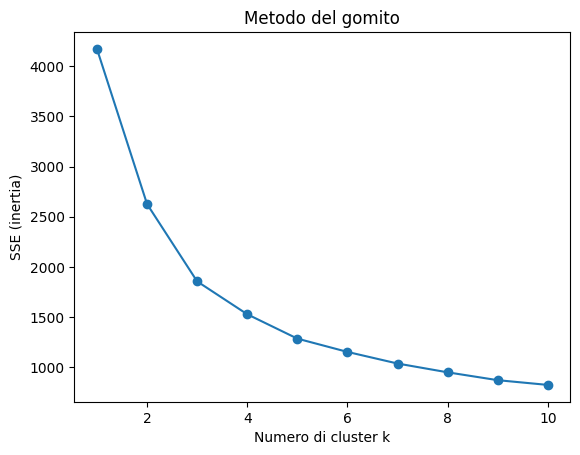

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[features])
    sse.append(kmeans.inertia_)

    print(f"k={k}, SSE={kmeans.inertia_}")

plt.plot(K_range, sse, marker='o')
plt.xlabel('Numero di cluster k')
plt.ylabel('SSE (inertia)')
plt.title('Metodo del gomito')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled[features])
    score = silhouette_score(df_scaled[features], labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.422
k=3, Silhouette Score=0.327
k=4, Silhouette Score=0.291
k=5, Silhouette Score=0.317
k=6, Silhouette Score=0.278
k=7, Silhouette Score=0.290
k=8, Silhouette Score=0.270
k=9, Silhouette Score=0.283
k=10, Silhouette Score=0.284


In [ ]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizziamo i cluster
print(df_scaled.head())


   MaxPlayers  ComMaxPlaytime  GameWeight  ComAgeRec  Cluster
0       0.250        0.086957     0.36666   0.315789        4
1       0.375        0.043478     0.20000   0.315789        4
2       0.375        0.608696     0.73334   0.421053        0
3       0.000        0.043478     0.26154   0.263158        1
4       0.250        0.043478     0.30000   0.421053        4


In [ ]:
# Dimensione di ciascun cluster
cluster_sizes = df_scaled['Cluster'].value_counts().sort_index()
print(cluster_sizes)


Cluster
0    5049
1    3037
2    2569
3    2337
4    8933
Name: count, dtype: int64


In [ ]:
# Aggiungiamo i dati originali per interpretazione
df_km['Cluster'] = df_scaled['Cluster']

# Media delle feature per cluster, ignorando le colonne non numeriche
cluster_summary = df_km.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

                 BGGId  YearPublished  GameWeight  MinPlayers  MaxPlayers  \
Cluster                                                                     
0        129188.031491    2001.634581    2.628985    1.892850    4.305605   
1        108738.115575    1959.477445    1.971072    1.774448    2.057952   
2        116553.125730    1969.712729    1.450400    2.542624    8.824056   
3         74854.338468    1998.734275    3.172169    1.824989    3.605477   
4        125676.373447    1986.293071    1.461872    2.045002    4.840255   

         ComAgeRec  LanguageEase  BestPlayers     NumOwned    NumWant  ...  \
Cluster                                                                ...   
0        11.550729    197.813941     0.587443  2231.602496  81.457912  ...   
1         9.941626    199.283587     0.085611  1078.708923  27.586434  ...   
2         9.787064    184.765479     0.311794  1521.561308  21.449981  ...   
3        13.113611    197.943294     0.341891  1350.063757  62.059050 

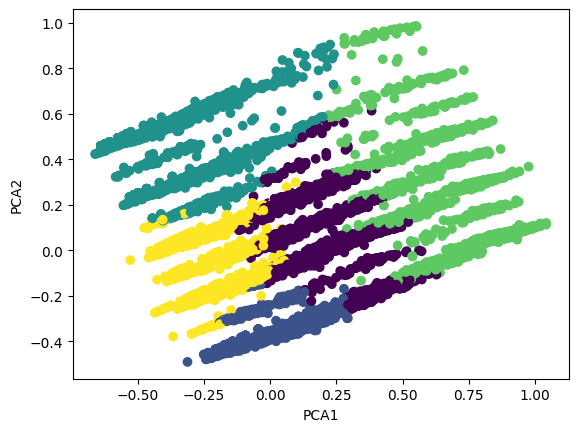

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

plt.scatter(components[:,0], components[:,1], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Numero di cluster scelto
k = 5


km6 = KMeans(n_clusters=k, random_state=42, n_init= 10)
km6.fit(df_scaled[features])


sse_k6 = km6.inertia_
print(f"SSE per k={k}: {sse_k6:.3f}")

# Silhouette score complessivo
sil_score = silhouette_score(df_scaled[features], km6.labels_)
print(f"Silhouette Score complessivo per k={k}: {sil_score:.3f}")

# Silhouette score per punto
sample_scores = silhouette_samples(df_scaled[features], km6.labels_)
df_km['Silhouette'] = sample_scores

# Silhouette media per cluster
sil_per_cluster = df_km.groupby(km6.labels_)['Silhouette'].mean()
print("\nSilhouette media per cluster:")
print(sil_per_cluster)


SSE per k=5: 1286.765
Silhouette Score complessivo per k=5: 0.317

Silhouette media per cluster:
0    0.215507
1    0.372228
2    0.365087
3    0.354053
4    0.332723
Name: Silhouette, dtype: float64


# esp2

Cosa cercare nei risultati

Silhouette Score: >0.5 → cluster abbastanza ben separati.

Statistiche dei cluster: le medie delle feature devono essere distinte tra cluster.

Dimensioni dei cluster: controlla che nessun cluster sia troppo piccolo o troppo grande (può indicare outlier o cluster poco significativo).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df_km2 = pd.read_csv('/content/drive/MyDrive/dm1Progetto/dataset/datasetCopiaSUPEROK.csv')
df_km2 = df_km2.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Selezioniamo le feature per il clustering
features = ['MinPlayers', 'GameWeight', 'ComMinPlaytime', 'ComAgeRec']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_km2[features]), columns=features)

In [ ]:
df_scaled.head()

,MinPlayers,GameWeight,ComMinPlaytime,ComAgeRec
0,0.2,0.36666,0.142857,0.315789
1,0.2,0.20000,0.057143,0.315789
2,0.1,0.73334,0.142857,0.421053
3,0.2,0.26154,0.085714,0.263158
4,0.2,0.30000,0.057143,0.421053


k=1, SSE=2800.8840261331
k=2, SSE=1332.683123521485
k=3, SSE=941.0454249194785
k=4, SSE=793.9569202327635
k=5, SSE=694.6229703859465
k=6, SSE=614.3706896185936
k=7, SSE=560.0230557053108
k=8, SSE=527.4595265406186
k=9, SSE=486.67680115872776
k=10, SSE=460.71486823409055


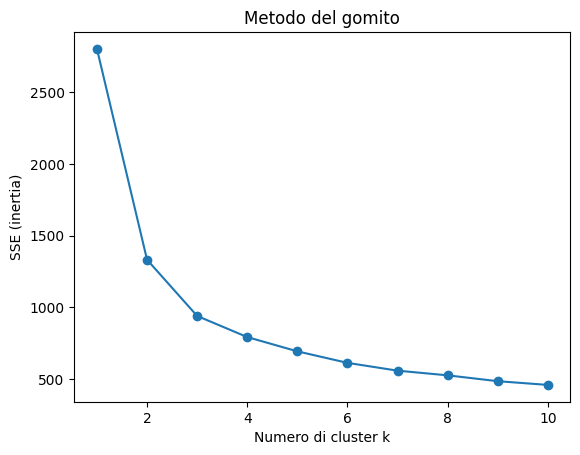

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[features])
    sse.append(kmeans.inertia_)

    print(f"k={k}, SSE={kmeans.inertia_}")

plt.plot(K_range, sse, marker='o')
plt.xlabel('Numero di cluster k')
plt.ylabel('SSE (inertia)')
plt.title('Metodo del gomito')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled[features])
    score = silhouette_score(df_scaled[features], labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.538
k=3, Silhouette Score=0.350
k=4, Silhouette Score=0.310
k=5, Silhouette Score=0.267
k=6, Silhouette Score=0.278
k=7, Silhouette Score=0.275
k=8, Silhouette Score=0.267
k=9, Silhouette Score=0.273
k=10, Silhouette Score=0.280


In [ ]:
from sklearn.cluster import KMeans


k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizziamo i cluster
print(df_scaled.head())

   MinPlayers  GameWeight  ComMinPlaytime  ComAgeRec  Cluster
0         0.2     0.36666        0.142857   0.315789        1
1         0.2     0.20000        0.057143   0.315789        1
2         0.1     0.73334        0.142857   0.421053        0
3         0.2     0.26154        0.085714   0.263158        1
4         0.2     0.30000        0.057143   0.421053        1


In [ ]:
# Dimensione di ciascun cluster
cluster_sizes = df_scaled['Cluster'].value_counts().sort_index()
print(cluster_sizes)


Cluster
0     7472
1    11414
2     3039
Name: count, dtype: int64


In [ ]:
df_km2['Cluster'] = df_scaled['Cluster']

# Media delle feature per cluster, ignorando le colonne non numeriche
cluster_summary = df_km2.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

                 BGGId  YearPublished  GameWeight  MinPlayers  MaxPlayers  \
Cluster                                                                     
0        128021.969352    1995.308084    2.477533    1.927463    4.455166   
1        128809.238654    1976.660242    1.385162    2.083844    5.049676   
2         50255.293189    1994.548865    3.006207    1.916420    3.749918   

         ComAgeRec  LanguageEase  BestPlayers     NumOwned    NumWant  ...  \
Cluster                                                                ...   
0        11.419592    196.981792     0.490766  2029.203828  70.725509  ...   
1         8.345174    193.647467     0.199141  1191.309795  21.732434  ...   
2        12.748599    197.948885     0.292859  1126.275090  45.264561  ...   

         Rank:childrensgames  Cat:Thematic  Cat:Strategy   Cat:War  \
Cluster                                                              
0               21877.341140      0.100910      0.225509  0.169299   
1            

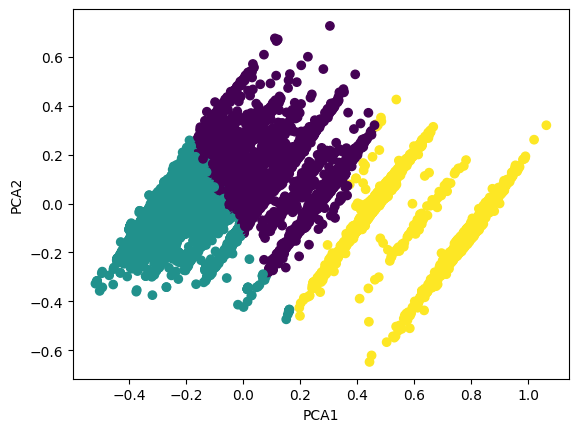

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

plt.scatter(components[:,0], components[:,1], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Numero di cluster scelto
k = 3


km6 = KMeans(n_clusters=k, random_state=42, n_init=10)
km6.fit(df_scaled[features])


sse_k6 = km6.inertia_
print(f"SSE per k={k}: {sse_k6:.3f}")

# Silhouette score complessivo
sil_score = silhouette_score(df_scaled[features], km6.labels_)
print(f"Silhouette Score complessivo per k={k}: {sil_score:.3f}")

# Silhouette score per punto
sample_scores = silhouette_samples(df_scaled[features], km6.labels_)
df_km['Silhouette'] = sample_scores

# Silhouette media per cluster
sil_per_cluster = df_km.groupby(km6.labels_)['Silhouette'].mean()
print("\nSilhouette media per cluster:")
print(sil_per_cluster)


SSE per k=3: 941.045
Silhouette Score complessivo per k=3: 0.350

Silhouette media per cluster:
0    0.246016
1    0.395741
2    0.430639
Name: Silhouette, dtype: float64


# esp3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df_km3 = pd.read_csv('/content/drive/MyDrive/dm1Progetto/dataset/datasetCopiaSUPEROK.csv')
df_km3 = df_km3.copy()
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


rating_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_km3['Rating'] = df_km3['Rating'].map(rating_map)

# Selezioniamo le feature per il clustering
features = ['MinPlayers', 'GameWeight', 'ComMinPlaytime', 'ComAgeRec', 'Rating']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_km3[features]), columns=features)



Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[features])
    sse.append(kmeans.inertia_)

    print(f"k={k}, SSE={kmeans.inertia_}")

plt.plot(K_range, sse, marker='o')
plt.xlabel('Numero di cluster k')
plt.ylabel('SSE (inertia)')
plt.title('Metodo del gomito')
plt.show()


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista per silhouette
sil_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled[features])
    score = silhouette_score(df_scaled[features], labels)
    sil_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

# Plot silhouette score
plt.figure(figsize=(7,5))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.xlabel('Numero di cluster k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per diversi k')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizziamo i cluster
print(df_scaled.head())

df_km3['Cluster'] = df_scaled['Cluster']

# Media delle feature per cluster, ignorando le colonne non numeriche
cluster_summary = df_km3.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)



   MinPlayers  GameWeight  ComMinPlaytime  ComAgeRec  Rating  Cluster
0         0.2     0.36666        0.142857   0.315789     0.0        1
1         0.2     0.20000        0.057143   0.315789     0.5        2
2         0.1     0.73334        0.142857   0.421053     1.0        0
3         0.2     0.26154        0.085714   0.263158     0.0        1
4         0.2     0.30000        0.057143   0.421053     0.5        2
                 BGGId  YearPublished  GameWeight  MinPlayers  MaxPlayers  \
Cluster                                                                     
0        206447.706337    2001.043131    2.326380    1.763046    4.252130   
1         72516.100030    1960.970127    1.455323    2.134882    5.165510   
2        139783.823856    1993.613290    1.791552    2.054848    4.825621   
3         34404.103433    1991.539056    2.814598    1.990129    3.893562   
4        105229.122656    2005.558594    3.365354    1.800781    3.726562   

         ComAgeRec  LanguageEase  BestPl

In [ ]:
# Dimensione di ciascun cluster
cluster_sizes = df_scaled['Cluster'].value_counts().sort_index()
print(cluster_sizes)


Cluster
0    3756
1    6628
2    7931
3    2330
4    1280
Name: count, dtype: int64


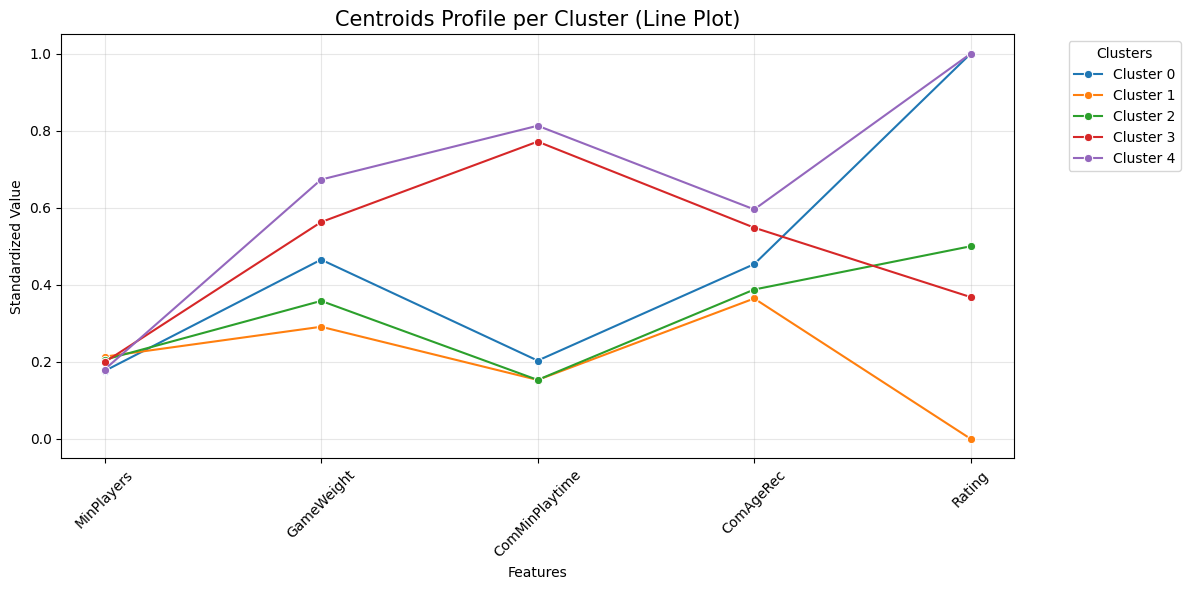

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Extract the centroids
# kmeans.cluster_centers_ returns a numpy array of shape (n_clusters, n_features)
centroids = kmeans.cluster_centers_

# 2. Create a DataFrame for the centroids for easier plotting
# We use the column names from your scaled dataframe (excluding the 'Cluster' column you added)
feature_names = df_scaled.drop(columns=['Cluster']).columns
centroids_df = pd.DataFrame(centroids, columns=feature_names)

# Add a Cluster ID column for the legend
centroids_df['Cluster'] = [f'Cluster {i}' for i in range(k)]

# 3. Melt the DataFrame to make it "tidy" (ideal for seaborn lineplots)
centroids_melted = centroids_df.melt(id_vars='Cluster', var_name='Feature', value_name='Centroid Value')

# 4. Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=centroids_melted, x='Feature', y='Centroid Value', hue='Cluster', marker='o')

plt.title('Centroids Profile per Cluster (Line Plot)', fontsize=15)
plt.ylabel('Standardized Value')
plt.xlabel('Features')
plt.xticks(rotation=45) # Rotates feature names if they are long
plt.grid(True, alpha=0.3)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.save('centorid_analysis.png', dpi = 300,)
plt.show()

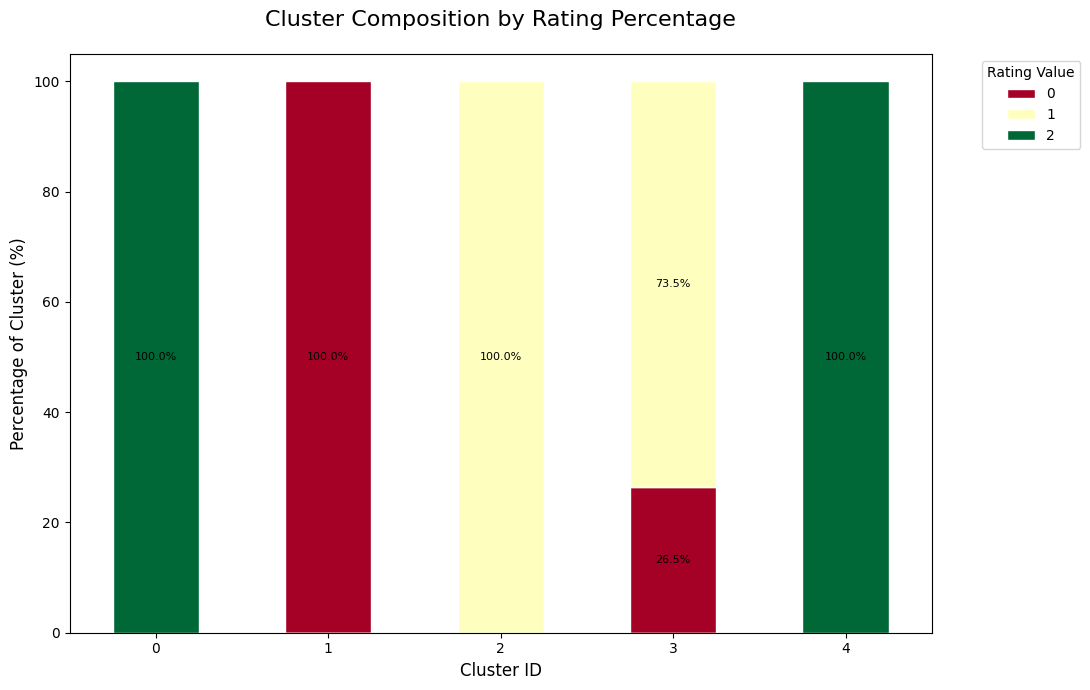

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Align the Rating from your original df with the Cluster results



# 2. Create the cross-tabulation (Counts of Ratings per Cluster)
# This creates a matrix where rows are clusters and columns are unique ratings
cross_tab = pd.crosstab(df_km3['Cluster'], df_km3['Rating'])

# 3. Normalize to get percentages (row-wise)
# We divide each row by its total sum so every bar equals 100%
cross_tab_prop = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# 4. Plotting the Stacked Bar Chart
ax = cross_tab_prop.plot(kind='bar',
                         stacked=True,
                         figsize=(11, 7),
                         colormap='RdYlGn', # Red-Yellow-Green is great for Ratings
                         edgecolor='white')

# Adding visual polish
plt.title('Cluster Composition by Rating Percentage', fontsize=16, pad=20)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Percentage of Cluster (%)', fontsize=12)
plt.legend(title='Rating Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0) # Keeps cluster numbers horizontal for readability

# 5. Add percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 3: # Only label segments larger than 3% for clarity
        x, y = p.get_xy()
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                horizontalalignment='center',
                verticalalignment='center',
                color='black',
                fontsize=8)

plt.tight_layout()
plt.show()

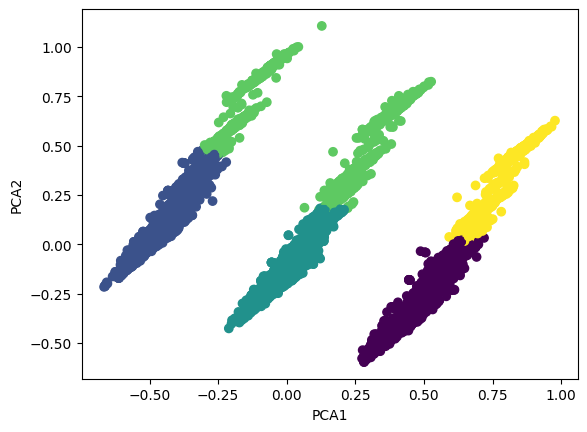

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

plt.scatter(components[:,0], components[:,1], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Numero di cluster scelto
k = 5

km6 = KMeans(n_clusters=k, random_state=42, n_init=10)
km6.fit(df_scaled[features])

# SSE
sse_k6 = km6.inertia_
print(f"SSE per k={k}: {sse_k6:.3f}")

# Silhouette score complessivo
sil_score = silhouette_score(df_scaled[features], km6.labels_)
print(f"Silhouette Score complessivo per k={k}: {sil_score:.3f}")

# Silhouette score per punto
sample_scores = silhouette_samples(df_scaled[features], km6.labels_)
df_km3['Silhouette'] = sample_scores

# Silhouette media per cluster
sil_per_cluster = df_km3.groupby(km6.labels_)['Silhouette'].mean()
print("\nSilhouette media per cluster:")
print(sil_per_cluster)


SSE per k=5: 1353.411
Silhouette Score complessivo per k=5: 0.465

Silhouette media per cluster:
0    0.453525
1    0.505080
2    0.510074
3    0.228953
4    0.442505
Name: Silhouette, dtype: float64


=== CLUSTER PROFILING REPORT ===

➡️ Profili dei cluster (valori medi):



,MinPlayers,GameWeight,ComMinPlaytime,ComAgeRec,Rating
Cluster,,,,,
0,1.763046,2.326380,40.559638,10.619335,2.000000
1,2.134882,1.455323,31.783343,8.924802,0.000000
2,2.054848,1.791552,31.839365,9.367270,1.000000
3,1.990129,2.814598,140.190987,12.422556,0.735193
4,1.800781,3.365354,147.238281,13.317041,2.000000



➡️ Profili normalizzati (z-scores):



,MinPlayers,GameWeight,ComMinPlaytime,ComAgeRec,Rating
Cluster,,,,,
0,-0.352474,0.405484,-0.234464,0.217921,1.484240
1,0.184014,-0.620517,-0.421386,-0.381500,-1.212533
2,0.068540,-0.224480,-0.420193,-0.224982,0.135853
3,-0.024837,0.980546,1.887539,0.855788,-0.221209
4,-0.298029,1.629270,2.037636,1.172201,1.484240


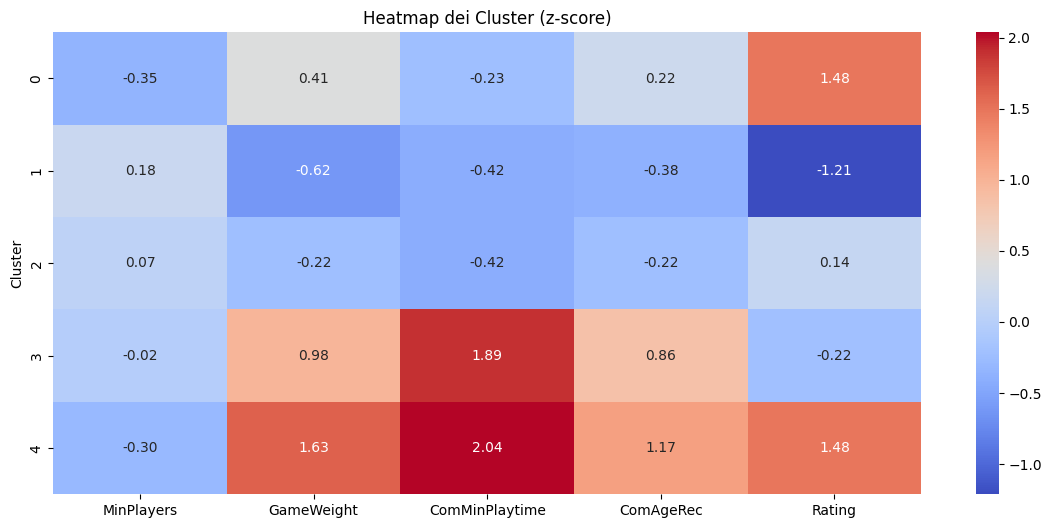



=== DESCRIZIONE AUTOMATICA DEI CLUSTER ===


🔹 **Cluster 0**
 - MinPlayers: in media (z=-0.35)
 - GameWeight: in media (z=0.41)
 - ComMinPlaytime: in media (z=-0.23)
 - ComAgeRec: in media (z=0.22)
 - Rating: sopra la media (z=1.48)

🔹 **Cluster 1**
 - MinPlayers: in media (z=0.18)
 - GameWeight: sotto la media (z=-0.62)
 - ComMinPlaytime: in media (z=-0.42)
 - ComAgeRec: in media (z=-0.38)
 - Rating: sotto la media (z=-1.21)

🔹 **Cluster 2**
 - MinPlayers: in media (z=0.07)
 - GameWeight: in media (z=-0.22)
 - ComMinPlaytime: in media (z=-0.42)
 - ComAgeRec: in media (z=-0.22)
 - Rating: in media (z=0.14)

🔹 **Cluster 3**
 - MinPlayers: in media (z=-0.02)
 - GameWeight: sopra la media (z=0.98)
 - ComMinPlaytime: molto sopra la media (z=1.89)
 - ComAgeRec: sopra la media (z=0.86)
 - Rating: in media (z=-0.22)

🔹 **Cluster 4**
 - MinPlayers: in media (z=-0.30)
 - GameWeight: molto sopra la media (z=1.63)
 - ComMinPlaytime: molto sopra la media (z=2.04)
 - ComAgeRec: sopra la media (z=

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def describe_cluster_value(v):
    """Restituisce una descrizione qualitativa del valore z-score."""
    if v > 1.5:
        return "molto sopra la media"
    elif v > 0.5:
        return "sopra la media"
    elif v > -0.5:
        return "in media"
    elif v > -1.5:
        return "sotto la media"
    else:
        return "molto sotto la media"


def cluster_profiling(df, features, cluster_col="Cluster"):
    """
    Profilazione completa dei cluster:
    - profilo delle medie
    - z-score
    - heatmap
    - descrizione automatica
    """

    print("=== CLUSTER PROFILING REPORT ===\n")

    # 1. PROFILO MEDIO
    cluster_profile = df_km3.groupby(cluster_col)[features].mean()
    print("➡️ Profili dei cluster (valori medi):\n")
    display(cluster_profile)

    # 2. PROFILO NORMALIZZATO (Z-SCORE)
    z_profile = (cluster_profile - df_km3[features].mean()) / df_km3[features].std()
    print("\n➡️ Profili normalizzati (z-scores):\n")
    display(z_profile)

    # 3. HEATMAP
    plt.figure(figsize=(14, 6))
    sns.heatmap(z_profile, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Heatmap dei Cluster (z-score)")
    plt.show()

    # 4. DESCRIZIONE AUTOMATICA DEI CLUSTER
    print("\n\n=== DESCRIZIONE AUTOMATICA DEI CLUSTER ===\n")

    for cluster in z_profile.index:
        print(f"\n🔹 **Cluster {cluster}**")
        for feature in features:
            val = z_profile.loc[cluster, feature]
            description = describe_cluster_value(val)
            print(f" - {feature}: {description} (z={val:.2f})")



cluster_profiling(
    df=df_km3,
    features=['MinPlayers', 'GameWeight', 'ComMinPlaytime', 'ComAgeRec', 'Rating'],
    cluster_col="Cluster"
)


# esp3 con sintetiche

In [ ]:
# importo il df
import pandas as pd
# importo il df
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
dfOk = pd.read_csv('/content/drive/MyDrive/dm1Progetto/dataset/datasetCopiaSUPEROK.csv')
df = dfOk.copy()

In [ ]:
def engineer_player_features(df):
    """Player count features"""
    df["RangePlayers"] = df["MaxPlayers"] - df["MinPlayers"]
    df["IsSoloPlayable"] = (df["MinPlayers"] == 1).astype(int)
    df["IsPartySize"] = (df["MaxPlayers"] >= 8).astype(int)
    return df

def engineer_playtime_features(df):
    """Playtime consistency"""
    df["PlaytimeRange"] = df["ComMaxPlaytime"] - df["ComMinPlaytime"]
    return df

def engineer_popularity_features(df):
    """Popularity-based features"""
    df["DemandRatio"] = df["NumWant"] / (df["NumOwned"] + 1)
    df["OwnershipRatio"] = df["NumOwned"] / (df["NumOwned"] + df["NumWant"] + 1)
    return df

def engineer_category_features(df):
    """Count number of categories"""
    cat_cols = [
        'Cat:Thematic','Cat:Strategy','Cat:War','Cat:Family',
        'Cat:CGS','Cat:Abstract','Cat:Party','Cat:Childrens'
    ]
    df["NumCategories"] = df[cat_cols].sum(axis=1)
    return df

def engineer_rank_features(df):
    """Ranking features: BestRank, AvgRank, RankSpread"""

    rank_cols = [
        'Rank:strategygames','Rank:abstracts','Rank:familygames',
        'Rank:thematic','Rank:cgs','Rank:wargames',
        'Rank:partygames','Rank:childrensgames'
    ]

    # Step 1 — 21926 = "missing", convert to NaN
    df[rank_cols] = df[rank_cols].replace(21926, np.nan)

    # Step 2 — BestRank: se tutte NaN → usa un valore neutro (es. 25000 o NaN)
    df["BestRank"] = df[rank_cols].fillna(25000).min(axis=1)

    # Step 3 — AvgRank: media dei valori REALI, ignorando NaN
    df["AvgRank"] = df[rank_cols].mean(axis=1)

    # Step 4 — Spread: differenza tra valori validi
    df["RankSpread"] = df[rank_cols].max(axis=1) - df[rank_cols].min(axis=1)

    return df

def apply_all_feature_engineering(df):
    """Apply all FE steps in correct order"""
    df = engineer_player_features(df)
    df = engineer_playtime_features(df)
    df = engineer_popularity_features(df)
    df = engineer_category_features(df)
    df = engineer_rank_features(df)
    return df

In [ ]:
df_km3 = apply_all_feature_engineering(df)

In [ ]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


rating_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_km3['Rating'] = df_km3['Rating'].map(rating_map)

# Selezioniamo le feature per il clustering
features = ['GameWeight', 'ComAgeRec', 'BestPlayers', 'NumWant', 'ComMaxPlaytime', 'PlaytimeRange', 'OwnershipRatio', 'Rating']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_km3[features]), columns=features)



k=1, SSE=6270.933271969644
k=2, SSE=3692.1665584149537
k=3, SSE=2560.775233667962
k=4, SSE=1902.5261066632902
k=5, SSE=1645.574301246663
k=6, SSE=1464.9636590299162
k=7, SSE=1327.3099549363164
k=8, SSE=1208.7552185415584
k=9, SSE=1132.128669036723
k=10, SSE=1063.5061316715983


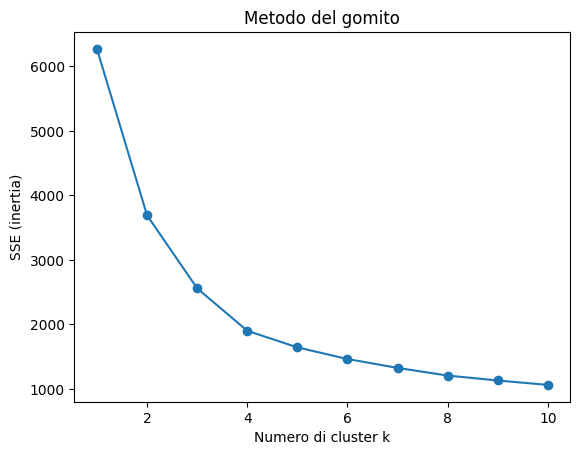

k=2, Silhouette Score=0.406
k=3, Silhouette Score=0.403
k=4, Silhouette Score=0.438
k=5, Silhouette Score=0.440
k=6, Silhouette Score=0.379
k=7, Silhouette Score=0.335
k=8, Silhouette Score=0.329
k=9, Silhouette Score=0.307
k=10, Silhouette Score=0.289


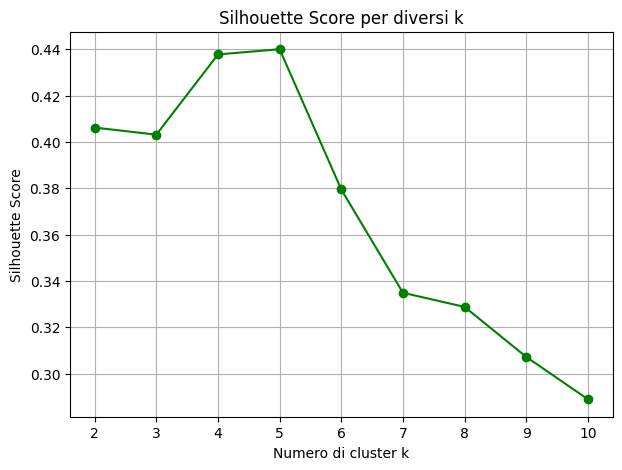

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[features])
    sse.append(kmeans.inertia_)

    print(f"k={k}, SSE={kmeans.inertia_}")

plt.plot(K_range, sse, marker='o')
plt.xlabel('Numero di cluster k')
plt.ylabel('SSE (inertia)')
plt.title('Metodo del gomito')
plt.show()


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista per silhouette
sil_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled[features])
    score = silhouette_score(df_scaled[features], labels)
    sil_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

# Plot silhouette score
plt.figure(figsize=(7,5))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.xlabel('Numero di cluster k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per diversi k')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizziamo i cluster
print(df_scaled.head())

df_km3['Cluster'] = df_scaled['Cluster']

# Media delle feature per cluster, ignorando le colonne non numeriche
cluster_summary = df_km3.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)



   GameWeight  ComAgeRec  BestPlayers   NumWant  ComMaxPlaytime  \
0     0.36666   0.315789          0.0  0.002954        0.086957   
1     0.20000   0.315789          0.0  0.005908        0.043478   
2     0.73334   0.421053          0.0  0.018218        0.608696   
3     0.26154   0.263158          0.0  0.000985        0.043478   
4     0.30000   0.421053          0.0  0.001969        0.043478   

   PlaytimeRange  OwnershipRatio  Rating  Cluster  
0       0.000000        0.987235     0.0        0  
1       0.021277        0.847332     0.5        3  
2       0.510638        0.956731     1.0        4  
3       0.000000        0.981209     0.0        0  
4       0.021277        0.976841     0.5        3  
                 BGGId  YearPublished  GameWeight  MinPlayers  MaxPlayers  \
Cluster                                                                     
0         69790.678337    1960.665791    1.487716    2.131729    5.136834   
1         51844.539074    1995.993529    2.881351    1

In [ ]:
# Dimensione di ciascun cluster
cluster_sizes = df_scaled['Cluster'].value_counts().sort_index()
print(cluster_sizes)


Cluster
0    6855
1    2009
2    3700
3    8012
4    1349
Name: count, dtype: int64


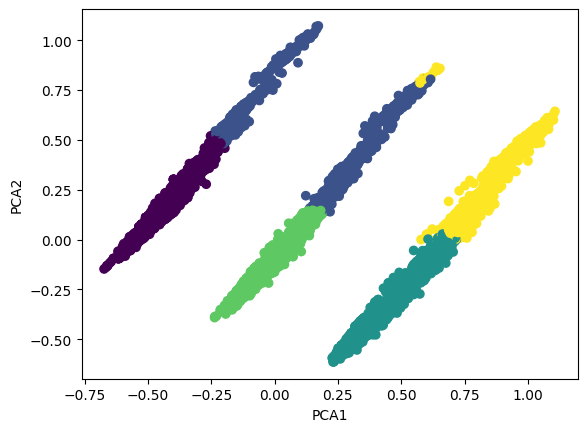

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

plt.scatter(components[:,0], components[:,1], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Numero di cluster scelto
k = 5

# KMeans
km6 = KMeans(n_clusters=k, random_state=42, n_init=10)
km6.fit(df_scaled[features])

# SSE
sse_k6 = km6.inertia_
print(f"SSE per k={k}: {sse_k6:.3f}")

# Silhouette score complessivo
sil_score = silhouette_score(df_scaled[features], km6.labels_)
print(f"Silhouette Score complessivo per k={k}: {sil_score:.3f}")


sample_scores = silhouette_samples(df_scaled[features], km6.labels_)
df_km3['Silhouette'] = sample_scores

# Silhouette media per cluster
sil_per_cluster = df_km3.groupby(km6.labels_)['Silhouette'].mean()
print("\nSilhouette media per cluster:")
print(sil_per_cluster)


SSE per k=5: 1645.574
Silhouette Score complessivo per k=5: 0.440

Silhouette media per cluster:
0    0.517754
1    0.168217
2    0.365423
3    0.494389
4    0.331179
Name: Silhouette, dtype: float64


=== CLUSTER PROFILING REPORT ===

➡️ Profili dei cluster (valori medi):



,GameWeight,ComAgeRec,BestPlayers,NumWant,ComMaxPlaytime,PlaytimeRange,OwnershipRatio,Rating
Cluster,,,,,,,,
0,1.487716,8.990122,0.032969,5.202772,38.684464,3.522538,0.975272,0.000000
1,2.881351,12.657133,0.229965,25.903932,177.168741,40.070682,0.957669,0.805874
2,2.308242,10.582425,0.760000,118.544865,62.276216,16.379730,0.935673,2.000000
3,1.794887,9.380021,0.311283,27.725412,41.114578,7.055916,0.958542,1.000000
4,3.372993,13.312698,0.619718,122.769459,204.714603,77.605634,0.924438,1.990363



➡️ Profili normalizzati (z-scores):



,GameWeight,ComAgeRec,BestPlayers,NumWant,ComMaxPlaytime,PlaytimeRange,OwnershipRatio,Rating
Cluster,,,,,,,,
0,-0.582362,-0.358394,-0.261057,-0.311186,-0.452328,-0.389499,0.353029,-1.212533
1,1.059173,0.938767,-0.076430,-0.134638,1.803016,0.862736,-0.001337,-0.125904
2,0.384120,0.204864,0.420321,0.655441,-0.068115,0.051022,-0.444116,1.484240
3,-0.220551,-0.220472,-0.000219,-0.119104,-0.412752,-0.268436,0.016241,0.135853
4,1.638269,1.170665,0.288848,0.691470,2.251626,2.148782,-0.670285,1.471246


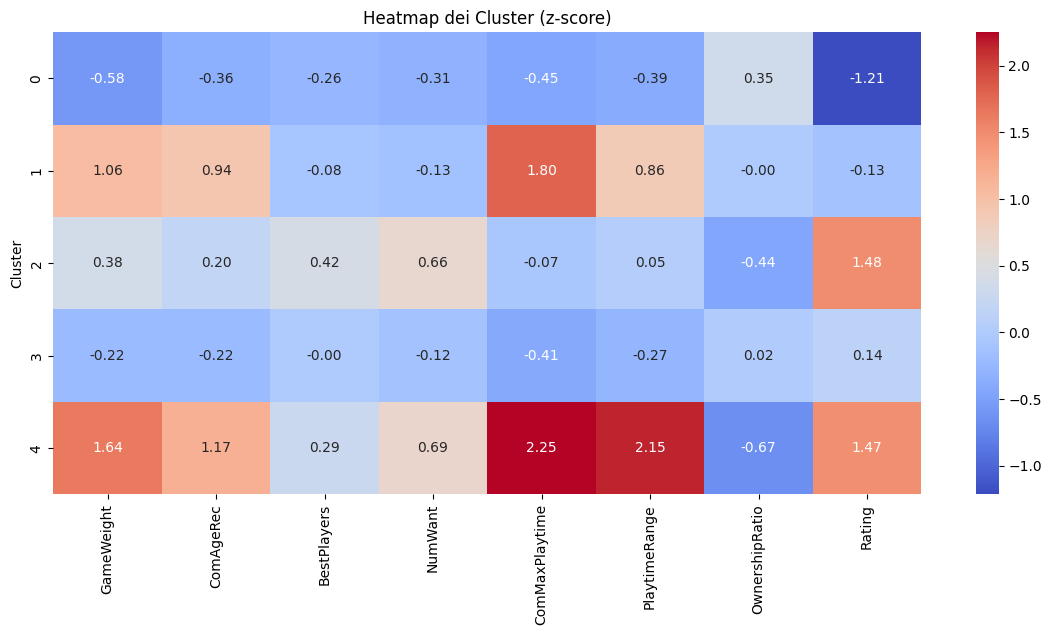



=== DESCRIZIONE AUTOMATICA DEI CLUSTER ===


🔹 **Cluster 0**
 - GameWeight: sotto la media (z=-0.58)
 - ComAgeRec: in media (z=-0.36)
 - BestPlayers: in media (z=-0.26)
 - NumWant: in media (z=-0.31)
 - ComMaxPlaytime: in media (z=-0.45)
 - PlaytimeRange: in media (z=-0.39)
 - OwnershipRatio: in media (z=0.35)
 - Rating: sotto la media (z=-1.21)

🔹 **Cluster 1**
 - GameWeight: sopra la media (z=1.06)
 - ComAgeRec: sopra la media (z=0.94)
 - BestPlayers: in media (z=-0.08)
 - NumWant: in media (z=-0.13)
 - ComMaxPlaytime: molto sopra la media (z=1.80)
 - PlaytimeRange: sopra la media (z=0.86)
 - OwnershipRatio: in media (z=-0.00)
 - Rating: in media (z=-0.13)

🔹 **Cluster 2**
 - GameWeight: in media (z=0.38)
 - ComAgeRec: in media (z=0.20)
 - BestPlayers: in media (z=0.42)
 - NumWant: sopra la media (z=0.66)
 - ComMaxPlaytime: in media (z=-0.07)
 - PlaytimeRange: in media (z=0.05)
 - OwnershipRatio: in media (z=-0.44)
 - Rating: sopra la media (z=1.48)

🔹 **Cluster 3**
 - GameWeight: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def describe_cluster_value(v):
    """Restituisce una descrizione qualitativa del valore z-score."""
    if v > 1.5:
        return "molto sopra la media"
    elif v > 0.5:
        return "sopra la media"
    elif v > -0.5:
        return "in media"
    elif v > -1.5:
        return "sotto la media"
    else:
        return "molto sotto la media"


def cluster_profiling(df, features, cluster_col="Cluster"):
    """
    Profilazione completa dei cluster:
    - profilo delle medie
    - z-score
    - heatmap
    - descrizione automatica
    """

    print("=== CLUSTER PROFILING REPORT ===\n")

    # 1. PROFILO MEDIO
    cluster_profile = df.groupby(cluster_col)[features].mean()
    print("➡️ Profili dei cluster (valori medi):\n")
    display(cluster_profile)

    # 2. PROFILO NORMALIZZATO (Z-SCORE)
    z_profile = (cluster_profile - df[features].mean()) / df[features].std()
    print("\n➡️ Profili normalizzati (z-scores):\n")
    display(z_profile)

    # 3. HEATMAP
    plt.figure(figsize=(14, 6))
    sns.heatmap(z_profile, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Heatmap dei Cluster (z-score)")
    plt.show()

    # 4. DESCRIZIONE AUTOMATICA DEI CLUSTER
    print("\n\n=== DESCRIZIONE AUTOMATICA DEI CLUSTER ===\n")

    for cluster in z_profile.index:
        print(f"\n🔹 **Cluster {cluster}**")
        for feature in features:
            val = z_profile.loc[cluster, feature]
            description = describe_cluster_value(val)
            print(f" - {feature}: {description} (z={val:.2f})")



cluster_profiling(
    df=df,
    features=['GameWeight', 'ComAgeRec', 'BestPlayers', 'NumWant', 'ComMaxPlaytime', 'PlaytimeRange', 'OwnershipRatio', 'Rating'],
    cluster_col="Cluster"
)


# esp 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df_km3 = pd.read_csv('/content/drive/MyDrive/dm1Progetto/dataset/datasetCopiaSUPEROK.csv')
df_km3 = df_km3.copy()
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


rating_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_km3['Rating'] = df_km3['Rating'].map(rating_map)

# Selezioniamo le feature per il clustering
features = ['MaxPlayers', 'GameWeight', 'ComMaxPlaytime', 'ComAgeRec', 'Rating']

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_km3[features]), columns=features)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


k=1, SSE=7185.867505812733
k=2, SSE=4615.2060632917255
k=3, SSE=3536.4240924792693
k=4, SSE=2891.3681014048157
k=5, SSE=2405.267661099786
k=6, SSE=2156.967775602216
k=7, SSE=1953.8839227509668
k=8, SSE=1817.0938392320688
k=9, SSE=1702.880042184277
k=10, SSE=1580.5354238111418


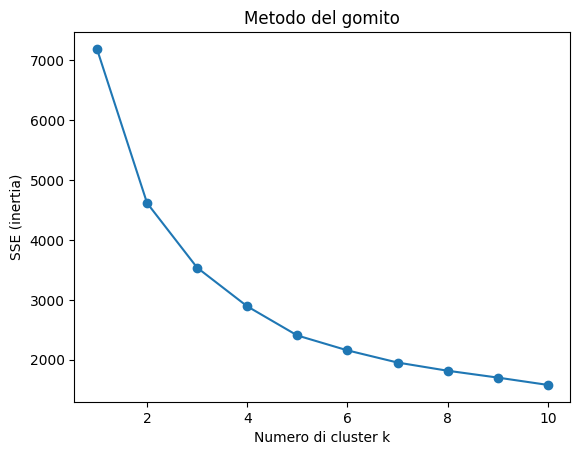

k=2, Silhouette Score=0.348
k=3, Silhouette Score=0.324
k=4, Silhouette Score=0.344
k=5, Silhouette Score=0.360
k=6, Silhouette Score=0.361
k=7, Silhouette Score=0.312
k=8, Silhouette Score=0.304
k=9, Silhouette Score=0.317
k=10, Silhouette Score=0.301


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[features])
    sse.append(kmeans.inertia_)

    print(f"k={k}, SSE={kmeans.inertia_}")

plt.plot(K_range, sse, marker='o')
plt.xlabel('Numero di cluster k')
plt.ylabel('SSE (inertia)')
plt.title('Metodo del gomito')
plt.show()


from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled[features])
    score = silhouette_score(df_scaled[features], labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

In [ ]:
from sklearn.cluster import KMeans


k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizziamo i cluster
print(df_scaled.head())

df_km3['Cluster'] = df_scaled['Cluster']

# Media delle feature per cluster, ignorando le colonne non numeriche
cluster_summary = df_km3.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)



   MaxPlayers  GameWeight  ComMaxPlaytime  ComAgeRec  Rating  Cluster
0       0.250     0.36666        0.086957   0.315789     0.0        4
1       0.375     0.20000        0.043478   0.315789     0.5        1
2       0.375     0.73334        0.608696   0.421053     1.0        5
3       0.000     0.26154        0.043478   0.263158     0.0        4
4       0.250     0.30000        0.043478   0.421053     0.5        1
                 BGGId  YearPublished  GameWeight  MinPlayers  MaxPlayers  \
Cluster                                                                     
0        201567.319417    2003.522448    2.290718    1.769517    4.149843   
1        135618.221838    1993.847738    1.856016    1.982282    4.227024   
2         46063.760870    1994.936805    2.910094    1.926694    3.514156   
3        111552.472759    1967.197276    1.388251    2.562390    8.918278   
4         69158.122166    1963.919363    1.508518    2.065236    4.472746   
5        129745.143840    2003.820372    

In [ ]:
# Dimensione di ciascun cluster
cluster_sizes = df_scaled['Cluster'].value_counts().sort_index()
print(cluster_sizes)


Cluster
0    3497
1    6942
2    1978
3    2276
4    5779
5    1453
Name: count, dtype: int64


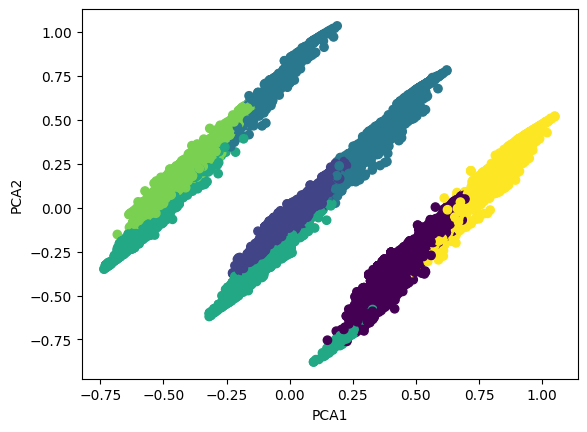

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

plt.scatter(components[:,0], components[:,1], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Numero di cluster scelto
k = 6

# KMeans
km6 = KMeans(n_clusters=k, random_state=42, n_init=10)
km6.fit(df_scaled[features])

# SSE
sse_k6 = km6.inertia_
print(f"SSE per k={k}: {sse_k6:.3f}")

# Silhouette score complessivo
sil_score = silhouette_score(df_scaled[features], km6.labels_)
print(f"Silhouette Score complessivo per k={k}: {sil_score:.3f}")

# Silhouette score per punto
sample_scores = silhouette_samples(df_scaled[features], km6.labels_)
df_km3['Silhouette'] = sample_scores

# Silhouette media per cluster
sil_per_cluster = df_km3.groupby(km6.labels_)['Silhouette'].mean()
print("\nSilhouette media per cluster:")
print(sil_per_cluster)


SSE per k=6: 2156.968
Silhouette Score complessivo per k=6: 0.361

Silhouette media per cluster:
0    0.343811
1    0.430674
2    0.159100
3    0.215094
4    0.418947
5    0.337682
Name: Silhouette, dtype: float64


# Task
Plot the Silhouette Scores for k from 2 to 10 from the results of the latest KMeans clustering experiment (`esp4`) and identify the optimal number of clusters based on this analysis.

## Prepare Silhouette Scores Data

### Subtask:
Extract the silhouette scores for each 'k' value (from 2 to 10) from the previous execution results and prepare them for plotting.


**Reasoning**:
I will create a Python list for k values, manually extract the corresponding silhouette scores from the previous cell output, and then combine them into a pandas DataFrame for easy plotting and analysis, as per the instructions.



In [ ]:
k_values = list(range(2, 11))
silhouette_scores = [
    0.348, # k=2
    0.324, # k=3
    0.344, # k=4
    0.360, # k=5
    0.361, # k=6
    0.312, # k=7
    0.304, # k=8
    0.317, # k=9
    0.301  # k=10
]

silhouette_df = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'Silhouette Score': silhouette_scores
})

print(silhouette_df)


   Number of Clusters (k)  Silhouette Score
0                       2             0.348
1                       3             0.324
2                       4             0.344
3                       5             0.360
4                       6             0.361
5                       7             0.312
6                       8             0.304
7                       9             0.317
8                      10             0.301


## Plot Silhouette Scores

### Subtask:
Generate a line plot showing the Silhouette Score as a function of the number of clusters 'k'. This will help in identifying the optimal number of clusters based on the silhouette analysis.


**Reasoning**:
I need to generate a line plot to visualize the silhouette scores as a function of the number of clusters 'k' to help identify the optimal number of clusters. This involves using `seaborn.lineplot` with appropriate labels, title, and markers.



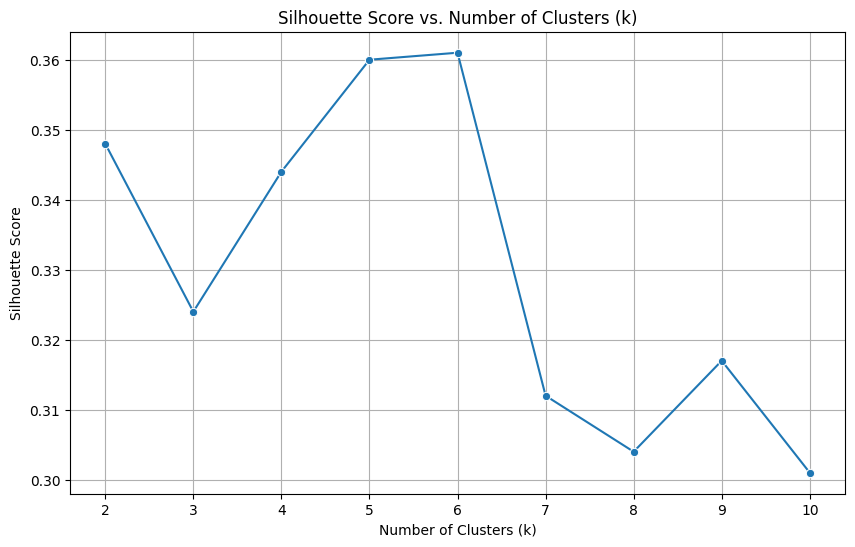

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Clusters (k)', y='Silhouette Score', data=silhouette_df, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from the silhouette plot regarding the optimal number of clusters.


## Summary:

### Q&A
The optimal number of clusters based on the silhouette analysis is 6.

### Data Analysis Key Findings
*   Silhouette scores were calculated for the number of clusters (k) ranging from 2 to 10.
*   The highest silhouette score observed was 0.361, which occurred when k = 6.
*   The second highest score was 0.360 for k = 5, very close to the peak.
*   Scores generally increased from k=2 (0.348) to k=6 (0.361), then decreased significantly, dropping to 0.301 for k=10.

### Insights or Next Steps
*   Given that k=6 yields the highest silhouette score, it is recommended to proceed with 6 clusters for further analysis and model building.
*   Although k=5 also shows a high silhouette score (0.360), k=6 offers a slightly better separation, suggesting a marginal improvement in cluster distinctiveness.
